In [1]:
import findspark
findspark.init('/home/ubuntu/spark-2.1.1-bin-hadoop2.7')
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('assignment_4').getOrCreate()

In [2]:
df = spark.read.csv("./fetal_health_NEW.csv",inferSchema =True,header=True)

In [3]:
from IPython.core.display import display, HTML
#display(HTML("<style>.container { width:100% !important; }</style>"))
display(HTML("<style>pre { white-space: pre !important; }</style>"))

In [4]:
df.show()

+--------------+-------------+--------------+--------------------+--------------------+------------------------+----+------+--------+------+--------+--------+---------+---------+-----------+-------------+-------------+------------+
|baseline value|accelerations|fetal_movement|uterine_contractions|severe_decelerations|prolongued_decelerations|ASTV|MVOSTV|POTWALTV|MVOLTV|hist_min|hist_max|hist_mode|hist_mean|hist_median|hist_variance|hist_tendency|fetal_health|
+--------------+-------------+--------------+--------------------+--------------------+------------------------+----+------+--------+------+--------+--------+---------+---------+-----------+-------------+-------------+------------+
|           134|        0.001|           0.0|                0.01|                 0.0|                   0.002|  26|   5.9|       0|   0.0|      50|     200|       76|      107|        107|          170|            0|           0|
|           134|        0.001|           0.0|               0.013|      

In [5]:
df.columns

['baseline value',
 'accelerations',
 'fetal_movement',
 'uterine_contractions',
 'severe_decelerations',
 'prolongued_decelerations',
 'ASTV',
 'MVOSTV',
 'POTWALTV',
 'MVOLTV',
 'hist_min',
 'hist_max',
 'hist_mode',
 'hist_mean',
 'hist_median',
 'hist_variance',
 'hist_tendency',
 'fetal_health']

In [6]:
df.describe().show()

+-------+------------------+--------------------+-------------------+--------------------+--------------------+------------------------+-----------------+------------------+------------------+-----------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+-------------------+
|summary|    baseline value|       accelerations|     fetal_movement|uterine_contractions|severe_decelerations|prolongued_decelerations|             ASTV|            MVOSTV|          POTWALTV|           MVOLTV|          hist_min|          hist_max|         hist_mode|         hist_mean|       hist_median|     hist_variance|     hist_tendency|       fetal_health|
+-------+------------------+--------------------+-------------------+--------------------+--------------------+------------------------+-----------------+------------------+------------------+-----------------+------------------+------------------+------------------+-----

In [7]:
df.printSchema()

root
 |-- baseline value: integer (nullable = true)
 |-- accelerations: double (nullable = true)
 |-- fetal_movement: double (nullable = true)
 |-- uterine_contractions: double (nullable = true)
 |-- severe_decelerations: double (nullable = true)
 |-- prolongued_decelerations: double (nullable = true)
 |-- ASTV: integer (nullable = true)
 |-- MVOSTV: double (nullable = true)
 |-- POTWALTV: integer (nullable = true)
 |-- MVOLTV: double (nullable = true)
 |-- hist_min: integer (nullable = true)
 |-- hist_max: integer (nullable = true)
 |-- hist_mode: integer (nullable = true)
 |-- hist_mean: integer (nullable = true)
 |-- hist_median: integer (nullable = true)
 |-- hist_variance: integer (nullable = true)
 |-- hist_tendency: integer (nullable = true)
 |-- fetal_health: integer (nullable = true)



In [8]:
df_new = df.withColumn('hist_gap',df['hist_max']-df['hist_min'])
df_new.createOrReplaceTempView('fet')

In [9]:
results_gap = spark.sql("SELECT hist_gap FROM fet")
results_gap.show()

+--------+
|hist_gap|
+--------+
|     150|
|     150|
|      68|
|      68|
|      68|
|     128|
|     145|
|      16|
|      16|
|      12|
|      24|
|      10|
|      18|
|      25|
|      16|
|     146|
|       8|
|      14|
|       7|
|      14|
+--------+
only showing top 20 rows



In [10]:
df_new = df_new.drop('hist_max',"hist_min")

In [11]:
df_new.printSchema()

root
 |-- baseline value: integer (nullable = true)
 |-- accelerations: double (nullable = true)
 |-- fetal_movement: double (nullable = true)
 |-- uterine_contractions: double (nullable = true)
 |-- severe_decelerations: double (nullable = true)
 |-- prolongued_decelerations: double (nullable = true)
 |-- ASTV: integer (nullable = true)
 |-- MVOSTV: double (nullable = true)
 |-- POTWALTV: integer (nullable = true)
 |-- MVOLTV: double (nullable = true)
 |-- hist_mode: integer (nullable = true)
 |-- hist_mean: integer (nullable = true)
 |-- hist_median: integer (nullable = true)
 |-- hist_variance: integer (nullable = true)
 |-- hist_tendency: integer (nullable = true)
 |-- fetal_health: integer (nullable = true)
 |-- hist_gap: integer (nullable = true)



In [12]:
df_new.describe().show()

+-------+------------------+--------------------+-------------------+--------------------+--------------------+------------------------+-----------------+------------------+------------------+-----------------+------------------+------------------+------------------+------------------+------------------+-------------------+-----------------+
|summary|    baseline value|       accelerations|     fetal_movement|uterine_contractions|severe_decelerations|prolongued_decelerations|             ASTV|            MVOSTV|          POTWALTV|           MVOLTV|         hist_mode|         hist_mean|       hist_median|     hist_variance|     hist_tendency|       fetal_health|         hist_gap|
+-------+------------------+--------------------+-------------------+--------------------+--------------------+------------------------+-----------------+------------------+------------------+-----------------+------------------+------------------+------------------+------------------+------------------+-------

In [13]:
df_new = df_new.drop('hist_mode',"hist_median")

In [14]:
df_new.printSchema()

root
 |-- baseline value: integer (nullable = true)
 |-- accelerations: double (nullable = true)
 |-- fetal_movement: double (nullable = true)
 |-- uterine_contractions: double (nullable = true)
 |-- severe_decelerations: double (nullable = true)
 |-- prolongued_decelerations: double (nullable = true)
 |-- ASTV: integer (nullable = true)
 |-- MVOSTV: double (nullable = true)
 |-- POTWALTV: integer (nullable = true)
 |-- MVOLTV: double (nullable = true)
 |-- hist_mean: integer (nullable = true)
 |-- hist_variance: integer (nullable = true)
 |-- hist_tendency: integer (nullable = true)
 |-- fetal_health: integer (nullable = true)
 |-- hist_gap: integer (nullable = true)



In [15]:
df.createOrReplaceTempView('fet')
results = spark.sql("SELECT fetal_health FROM fet WHERE fetal_health == 1")

In [16]:
Normal = results.count()

In [17]:
results2 = spark.sql("SELECT fetal_health FROM fet WHERE fetal_health == 0")

In [18]:
Pathological = results2.count()

In [19]:
import matplotlib.pyplot as plt
pie_chart = plt.pie([Normal, Pathological], labels=["Normal", "Pathological"], colors = ["#A4D3EE", "#BBFFFF"], autopct="%1.0f%%")
plt.title("Fetal health Pie Chart")

Text(0.5,1,'Fetal health Pie Chart')

Text(0.5,1,'Fetal health bar Chart')

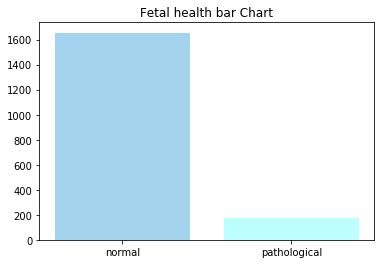

In [20]:
bar_chart = plt.bar(x = ["normal", "pathological"], height = [1655, 176], color = ["#A4D3EE", "#BBFFFF"])
plt.title("Fetal health bar Chart")

In [21]:
import pandas as pd
pd_df = df_new.toPandas()

Text(0,0.5,'fetal_health')

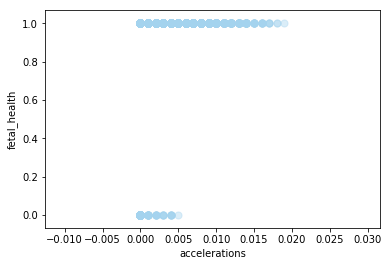

In [22]:
import numpy as np
area = np.pi * 4**2
plt.scatter(pd_df["accelerations"],pd_df["fetal_health"], s = area, color = "#A4D3EE",alpha=0.4)
plt.xlabel('accelerations')
plt.ylabel('fetal_health')

Text(0,0.5,'fetal_health')

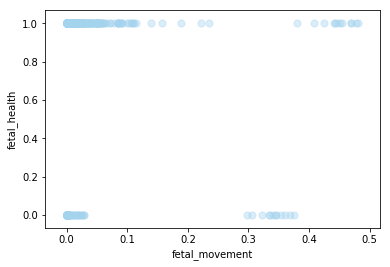

In [23]:
plt.scatter(pd_df["fetal_movement"],pd_df["fetal_health"], s = area, color = "#A4D3EE",alpha=0.4)
plt.xlabel('fetal_movement')
plt.ylabel('fetal_health')

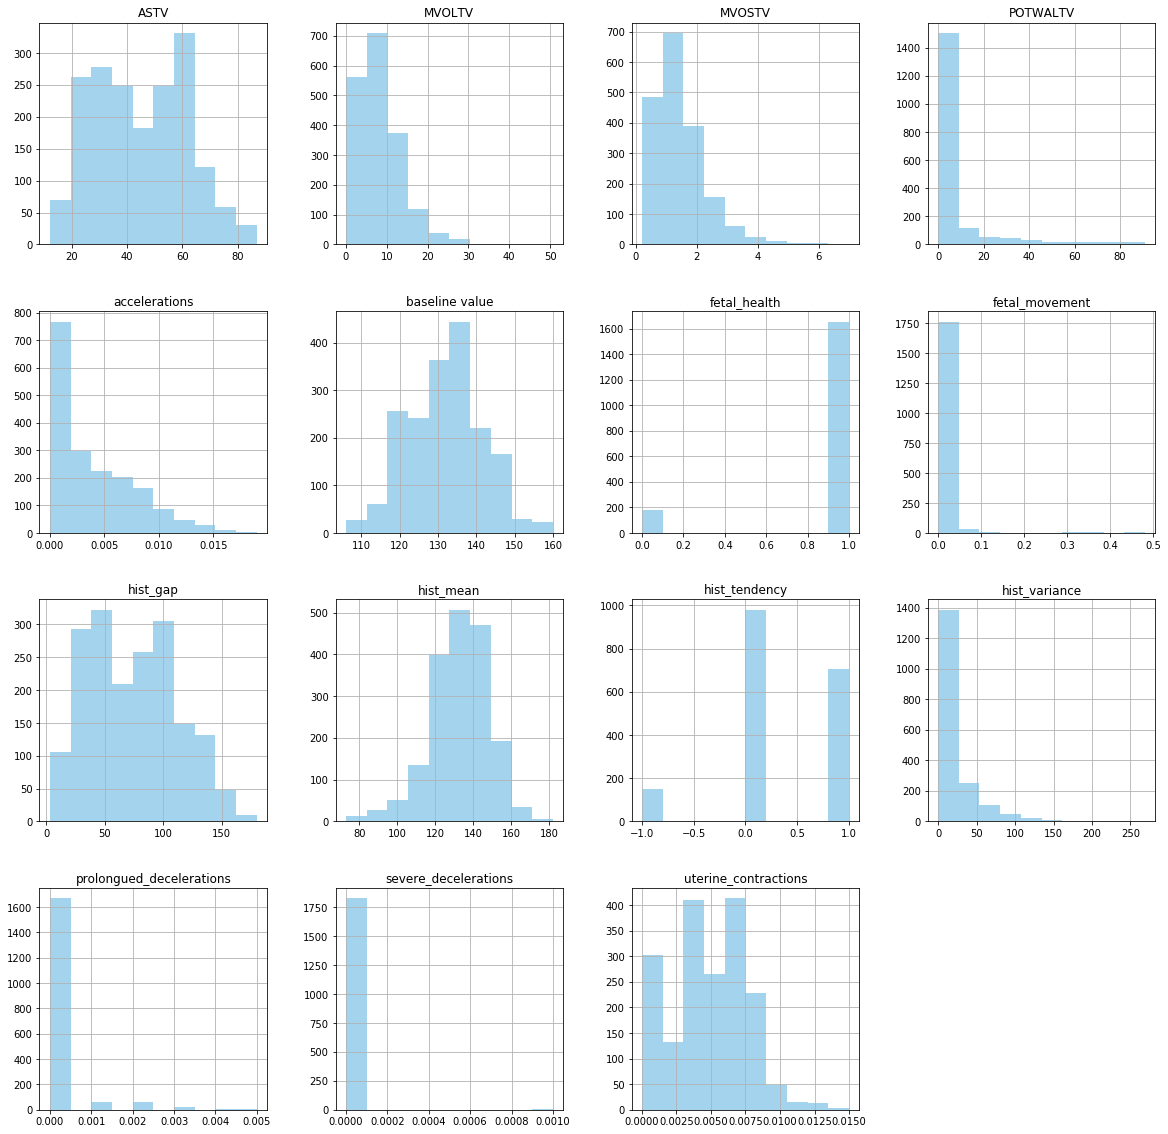

In [24]:
data_hist_plot = pd_df.hist(figsize = (20,20) , color = "#A4D3EE")

In [25]:
results.count()

1655

In [26]:
df.count()

1831

In [27]:
df.na.drop().count()

1831

In [28]:
df_1 = spark.read.csv("./fetal_health_NEW_1.csv",inferSchema =True,header=True)
df_2 = spark.read.csv("./fetal_health_NEW_2.csv",inferSchema =True,header=True)
df_whole = df_1.union(df_2)

In [29]:
df_whole.count()

1831

In [30]:
df_whole.describe().show()

+-------+------------------+--------------------+--------------------+--------------------+--------------------+------------------------+------------------+------------------+------------------+-----------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+
|summary|    baseline value|       accelerations|      fetal_movement|uterine_contractions|severe_decelerations|prolongued_decelerations|              ASTV|            MVOSTV|          POTWALTV|           MVOLTV|          hist_min|          hist_max|         hist_mode|         hist_mean|       hist_median|     hist_variance|     hist_tendency|      fetal_health|
+-------+------------------+--------------------+--------------------+--------------------+--------------------+------------------------+------------------+------------------+------------------+-----------------+------------------+------------------+------------------+-

In [31]:
df_new = df_new.drop('baseline value',"MVOSTV")

In [32]:
df_new.printSchema()

root
 |-- accelerations: double (nullable = true)
 |-- fetal_movement: double (nullable = true)
 |-- uterine_contractions: double (nullable = true)
 |-- severe_decelerations: double (nullable = true)
 |-- prolongued_decelerations: double (nullable = true)
 |-- ASTV: integer (nullable = true)
 |-- POTWALTV: integer (nullable = true)
 |-- MVOLTV: double (nullable = true)
 |-- hist_mean: integer (nullable = true)
 |-- hist_variance: integer (nullable = true)
 |-- hist_tendency: integer (nullable = true)
 |-- fetal_health: integer (nullable = true)
 |-- hist_gap: integer (nullable = true)



In [33]:
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.feature import (VectorAssembler,VectorIndexer,
                                OneHotEncoder,StringIndexer)



assembler = VectorAssembler(inputCols=['accelerations',
 'fetal_movement',
 'uterine_contractions',
 'severe_decelerations',
 'prolongued_decelerations',
 'ASTV',
 'POTWALTV',
 'MVOLTV',
 'hist_mean',
 'hist_variance',
 'hist_tendency',
 'hist_gap'],outputCol='features')

In [34]:
from pyspark.ml.classification import LogisticRegression

In [35]:
from pyspark.ml import Pipeline
log_reg_fet = LogisticRegression(featuresCol='features',labelCol='fetal_health')
pipeline = Pipeline(stages=[assembler, log_reg_fet])


In [36]:
train_fet_data, test_fet_data = df_new.randomSplit([0.7,.3])
fit_model = pipeline.fit(train_fet_data)
results = fit_model.transform(test_fet_data)

In [37]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator

my_eval = BinaryClassificationEvaluator(rawPredictionCol='prediction',
                                       labelCol='fetal_health')

In [38]:
AUC = my_eval.evaluate(results)

In [39]:
AUC

0.918956158663883

In [40]:
totalResults = results.select('fetal_health','prediction')

correctResults = totalResults.filter(totalResults['fetal_health'] == totalResults['prediction'])

countTR = totalResults.count()
print("Correct: " + str(countTR))

countTC = correctResults.count()
print("Total Correct: " + str(countTC)) 

Correct: 529
Total Correct: 520


In [43]:
correctResults.show()

+------------+----------+
|fetal_health|prediction|
+------------+----------+
|           1|       1.0|
|           1|       1.0|
|           1|       1.0|
|           1|       1.0|
|           1|       1.0|
|           1|       1.0|
|           1|       1.0|
|           1|       1.0|
|           1|       1.0|
|           1|       1.0|
|           0|       0.0|
|           0|       0.0|
|           0|       0.0|
|           0|       0.0|
|           0|       0.0|
|           0|       0.0|
|           0|       0.0|
|           0|       0.0|
|           1|       1.0|
|           1|       1.0|
+------------+----------+
only showing top 20 rows



In [46]:
Positive = totalResults.filter(totalResults['prediction'] == 1)
TP = Positive.filter(Positive['fetal_health'] == 1)

Precision = TP.count()/Positive.count()

In [47]:
Precision

0.9835390946502057

In [48]:
neg = totalResults.filter(totalResults['prediction'] == 0)
FN = neg.filter(neg['fetal_health'] == 0)

Recall = TP.count()/(TP.count()+FN.count())

In [49]:
Recall

0.9192307692307692

In [54]:
F1score=2*Precision*Recall / (Precision + Recall)

In [55]:
F1score

0.9502982107355864

In [56]:
train_fet_data, test_fet_data = df_new.randomSplit([0.6,.4])
fit_model = pipeline.fit(train_fet_data)
results = fit_model.transform(test_fet_data)
from pyspark.ml.evaluation import BinaryClassificationEvaluator

my_eval = BinaryClassificationEvaluator(rawPredictionCol='prediction',
                                       labelCol='fetal_health')
my_eval.evaluate(results)

0.9433361802505287

In [57]:
output = assembler.transform(df_new)

indexer = StringIndexer(inputCol="fetal_health", outputCol="fetal_healthIndex")
output_fixed = indexer.fit(output).transform(output)
final_data = output_fixed.select("features",'fetal_healthIndex')
train_data,test_data = final_data.randomSplit([0.7,0.3])

from pyspark.ml.classification import DecisionTreeClassifier,GBTClassifier,RandomForestClassifier
gbt = GBTClassifier(labelCol='fetal_healthIndex',featuresCol='features')
gbt_model = gbt.fit(train_data)
gbt_predictions = gbt_model.transform(test_data)
my_binary_eval = BinaryClassificationEvaluator(labelCol = 'fetal_healthIndex')

my_binary_gbt_eval = BinaryClassificationEvaluator(labelCol='fetal_healthIndex', rawPredictionCol='prediction')
print("GBT")
print(my_binary_gbt_eval.evaluate(gbt_predictions))

GBT
0.9312511619260084


In [58]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
acc_evaluator = MulticlassClassificationEvaluator(labelCol="fetal_healthIndex", predictionCol="prediction", metricName="accuracy")
gbt_acc = acc_evaluator.evaluate(gbt_predictions)
print('-'*40)
print('An ensemble using GBT has an accuracy of: {0:2.2f}%'.format(gbt_acc*100))

----------------------------------------
An ensemble using GBT has an accuracy of: 97.79%


In [65]:
train_data,test_data = final_data.randomSplit([0.7,0.3])

In [66]:
dtc = DecisionTreeClassifier(labelCol='fetal_healthIndex',featuresCol='features')

dtc_model = dtc.fit(train_data)
dtc_predictions = dtc_model.transform(test_data)
print("DTC")
print(my_binary_eval.evaluate(dtc_predictions))


dtc_acc = acc_evaluator.evaluate(dtc_predictions)
print('-'*40)
print('A single decision tree has an accuracy of: {0:2.2f}%'.format(dtc_acc*100))


DTC
0.8637221128608924
----------------------------------------
A single decision tree has an accuracy of: 97.66%


In [67]:
rfc = RandomForestClassifier(labelCol='fetal_healthIndex',featuresCol='features')
rfc_model = rfc.fit(train_data)
rfc_predictions = rfc_model.transform(test_data)
print("RFC")
print(my_binary_eval.evaluate(rfc_predictions))
rfc_acc = acc_evaluator.evaluate(rfc_predictions)
print('-'*40)
print('A random forest ensemble has an accuracy of: {0:2.2f}%'.format(rfc_acc*100))

RFC
0.99561187664042
----------------------------------------
A random forest ensemble has an accuracy of: 98.20%
